In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data=pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv('/kaggle/input/titanic/test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Q: What sorts of people were more likely to survive?

**DATA EXPLORATION**

In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Check for missing values
missing_values = train_data.isnull().sum()

# Print the missing values count
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Check for duplicates based on "PassengerId"
duplicate_passenger_ids = train_data['PassengerId'].duplicated()

# Check if any duplicates exist
if duplicate_passenger_ids.any():
    print("Duplicates exist based on 'PassengerId' column.")
else:
    print("No duplicates found based on 'PassengerId' column.")

No duplicates found based on 'PassengerId' column.


In [7]:
import matplotlib.pyplot as plt
# Filter the dataset for Survived=1 and Survived=0
survived = train_data[train_data['Survived'] == 1]
not_survived = train_data[train_data['Survived'] == 0]

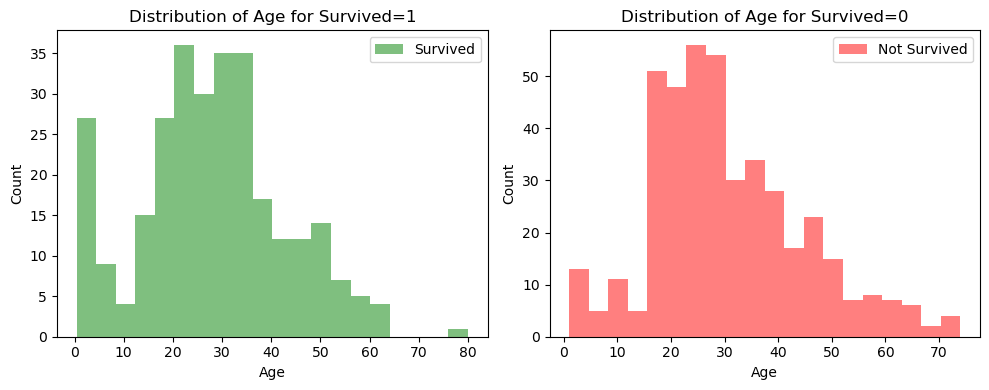

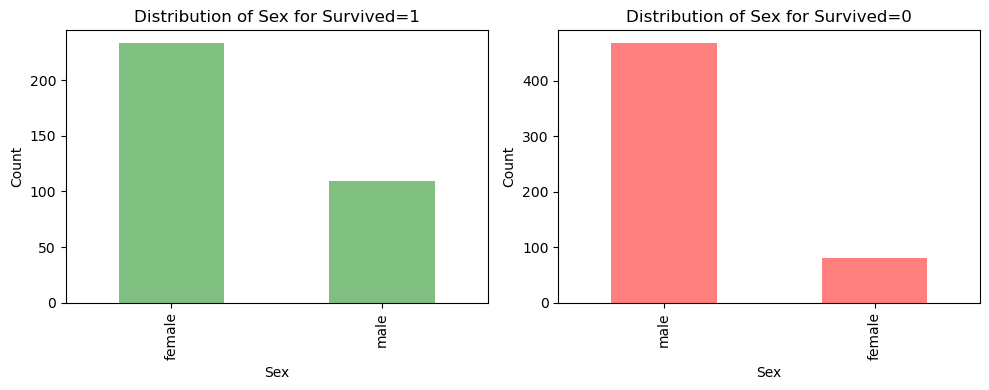

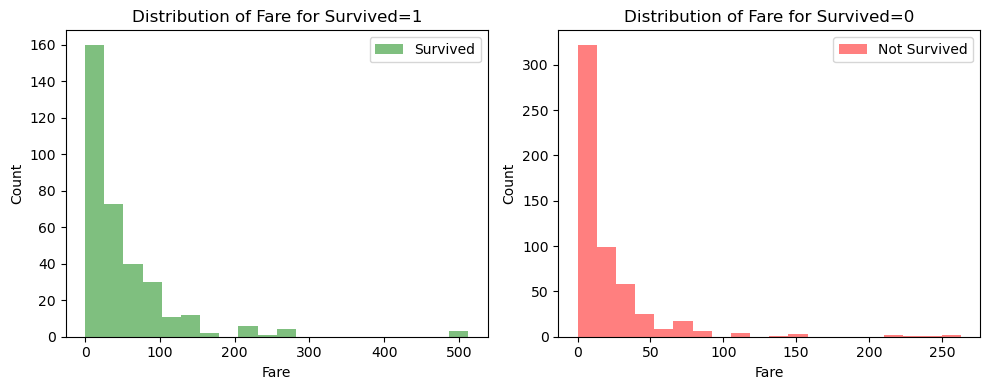

In [8]:
# Plot the distribution of Age for Survived=1 and Survived=0
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(survived['Age'].dropna(), bins=20, color='green', alpha=0.5, label='Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age for Survived=1')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(not_survived['Age'].dropna(), bins=20, color='red', alpha=0.5, label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age for Survived=0')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the distribution of Sex for Survived=1 and Survived=0
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
survived['Sex'].value_counts().plot(kind='bar', color='green', alpha=0.5)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex for Survived=1')

plt.subplot(1, 2, 2)
not_survived['Sex'].value_counts().plot(kind='bar', color='red', alpha=0.5)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex for Survived=0')

plt.tight_layout()
plt.show()

# Plot the distribution of Fare for Survived=1 and Survived=0
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(survived['Fare'].dropna(), bins=20, color='green', alpha=0.5, label='Survived')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare for Survived=1')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(not_survived['Fare'].dropna(), bins=20, color='red', alpha=0.5, label='Not Survived')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare for Survived=0')
plt.legend()

plt.tight_layout()
plt.show()

No distinct visual patterns accept from the fact that more kids (age<10) survived and less elders (age>60) survived, need to dig deeper

In [9]:
not_survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


In [10]:
survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [11]:
# separating the cat and num variables
df_num=train_data[['Age','Fare','SibSp',"Parch"]]
df_cat=train_data[['Survived', 'Pclass', 'Sex','Embarked','Cabin','Ticket']]

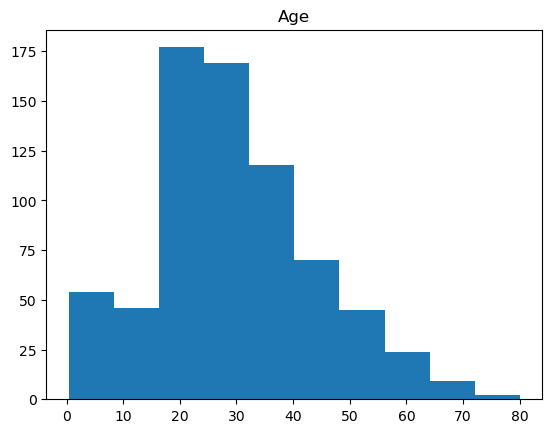

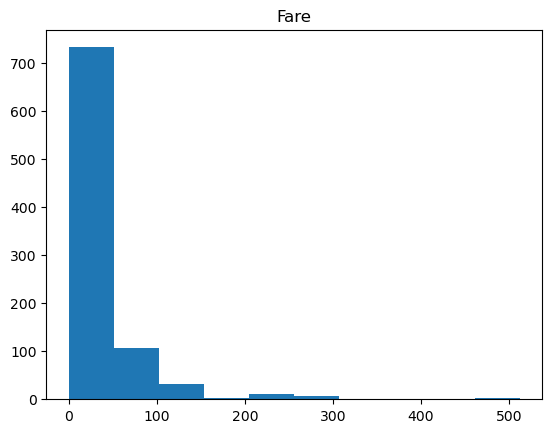

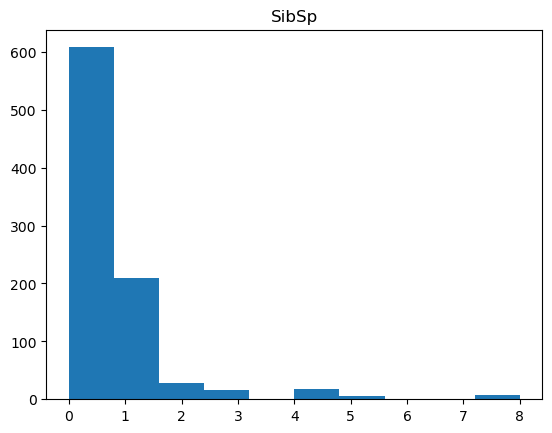

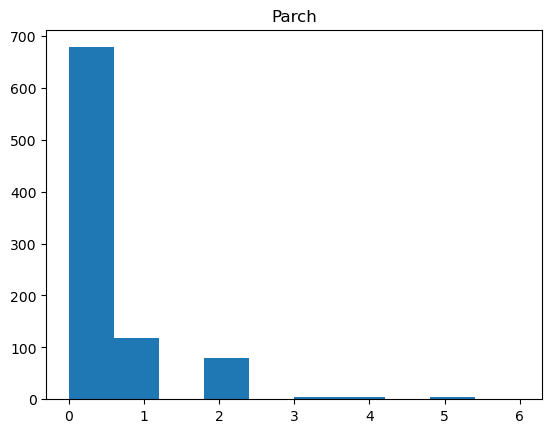

In [12]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age      Fare     SibSp     Parch
Age    1.000000  0.096067 -0.308247 -0.189119
Fare   0.096067  1.000000  0.159651  0.216225
SibSp -0.308247  0.159651  1.000000  0.414838
Parch -0.189119  0.216225  0.414838  1.000000


<Axes: >

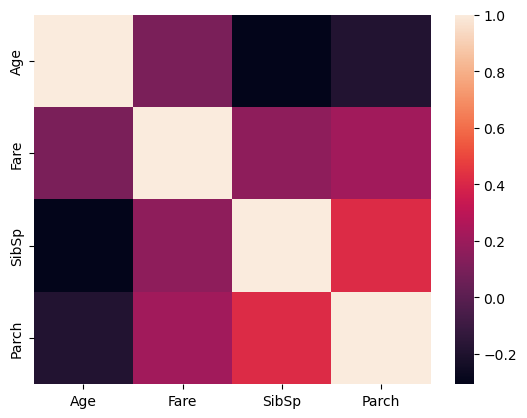

In [13]:
import seaborn as sns
print(df_num.corr())
sns.heatmap(df_num.corr())

No clear pattern is visible

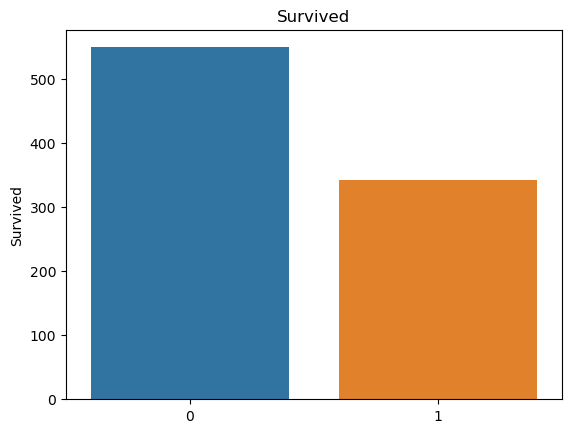

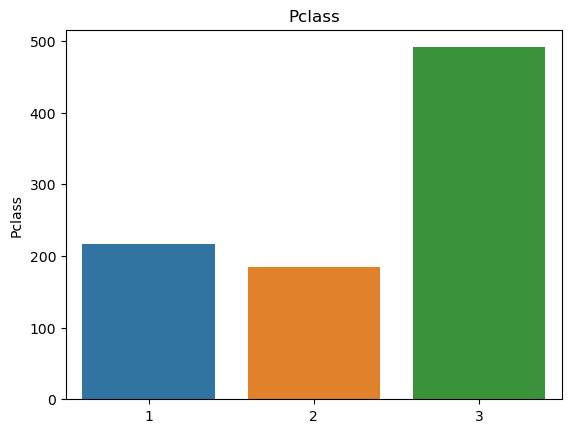

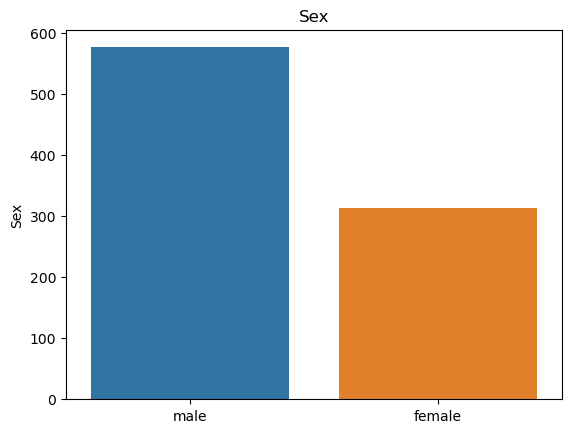

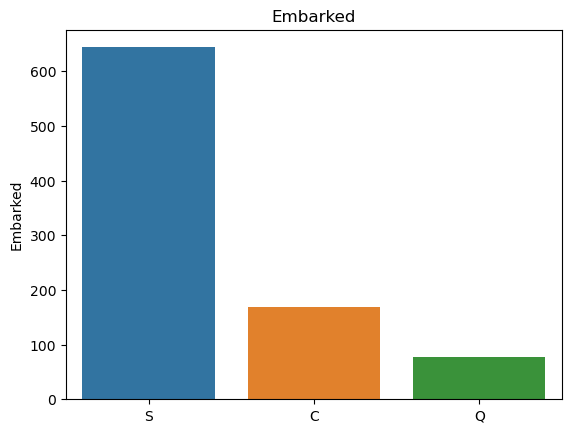

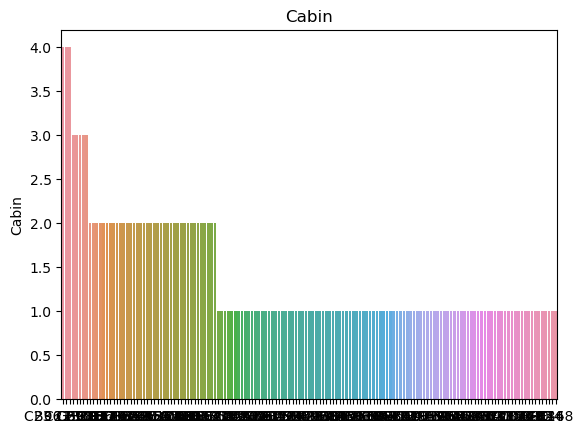

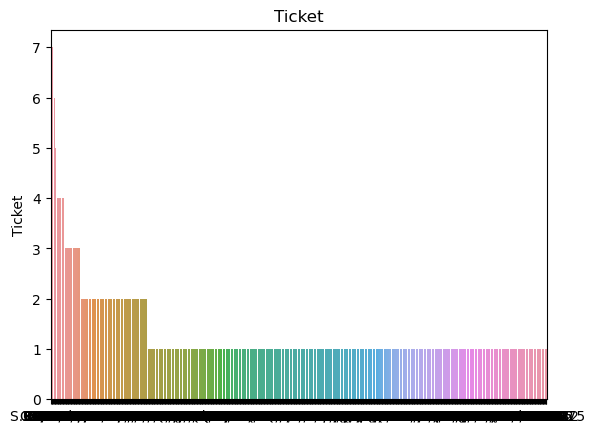

In [14]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.title(i)
    plt.show()

**DATA PREPROCESSING**

In [15]:
# Map 'Sex' column to numeric values
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# Dropping nulls from "Embarked"
train_data.dropna(subset=['Embarked'],inplace = True)

from sklearn.preprocessing import LabelEncoder

# Perform label encoding on 'Embarked' column
label_encoder = LabelEncoder()
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])


# Access the mapping between original values and encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the label mapping
print(label_mapping)

{'C': 0, 'Q': 1, 'S': 2}


In [16]:
# Impute null values with the median age within each group
train_data['Age'] = train_data.groupby(['Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
train_data.reset_index(drop=True, inplace=True)

# Check for missing values
missing_values = train_data.isnull().sum()

# Print the missing values count
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


**Model Building**

In [17]:
data = train_data[['Pclass','Survived','Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]
X = data.drop('Survived', axis=1)  # Features
y = data['Survived']  # Target variable

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [19]:
# Naive Bayes
gnb = GaussianNB()
cv = cross_val_score(gnb,X,y,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.79213483 0.78651685 0.80337079 0.80225989]
0.7907890560528154


In [20]:
#Logistic Regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X,y,cv=5)
print(cv)
print(cv.mean())

[0.78089888 0.78651685 0.78651685 0.76966292 0.82485876]
0.7896908525360249


In [21]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X,y,cv=5)
print(cv)
print(cv.mean())

[0.73595506 0.76966292 0.79775281 0.75842697 0.83050847]
0.778461245477052


In [22]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X,y,cv=5)
print(cv)
print(cv.mean())

[0.78089888 0.80337079 0.86516854 0.78651685 0.83615819]
0.8144226496540343


In [23]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X,y,cv=5)
print(cv)
print(cv.mean())

[0.64606742 0.66853933 0.71910112 0.74157303 0.72316384]
0.6996889481368628


In [24]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X,y,cv=5)
print(cv)
print(cv.mean())

[0.58988764 0.71348315 0.68539326 0.68539326 0.68926554]
0.6726845680187902


In [25]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X,y,cv=5)
print(cv)
print(cv.mean())

[0.78651685 0.82022472 0.85393258 0.7752809  0.84180791]
0.815552593156859


**Fitting XgBoost**

Prepping the test data

In [26]:
X_test = test[['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]
# Map 'Sex' column to numeric values
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})

# Impute null values with the median age within each group
X_test['Age'] = X_test.groupby(['Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
X_test.reset_index(drop=True, inplace=True)

# Dropping nulls from "Embarked"
#X_test.dropna(subset=['Embarked'],inplace = True)

from sklearn.preprocessing import LabelEncoder

# Perform label encoding on 'Embarked' column
label_encoder = LabelEncoder()
X_test['Embarked'] = label_encoder.fit_transform(X_test['Embarked'])

# Dropping nulls from "Fare"
#X_test.dropna(subset=['Fare'],inplace = True)
#test.dropna(subset=['Fare'],inplace = True)

print(X_test)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    0  34.5      0      0    7.8292         1
1         3    1  47.0      1      0    7.0000         2
2         2    0  62.0      0      0    9.6875         1
3         3    0  27.0      0      0    8.6625         2
4         3    1  22.0      1      1   12.2875         2
..      ...  ...   ...    ...    ...       ...       ...
413       3    0  27.0      0      0    8.0500         2
414       1    1  39.0      0      0  108.9000         0
415       3    0  38.5      0      0    7.2500         2
416       3    0  27.0      0      0    8.0500         2
417       3    0  27.0      1      1   22.3583         0

[418 rows x 7 columns]


/tmp/ipykernel_33/3465851237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})
/tmp/ipykernel_33/3465851237.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age'] = X_test.groupby(['Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
/tmp/ipykernel_33/3465851237.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [27]:
# Check for missing values
missing_values = X_test.isnull().sum()

# Print the missing values count
print(missing_values)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64


In [28]:
xgb.fit(X,y)
y_hat_base_vc = xgb.predict(X_test).astype(int)

prediction = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
prediction = pd.DataFrame(data=prediction)
prediction.to_csv('submission.csv', index=False)

In [29]:
print(prediction)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
